# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Read Dataset

In [2]:
df = pd.read_csv("Wine.csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


# Separate dependent & independent variable

In [4]:
x = df.iloc[:,:-1].values

In [5]:
x

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [21]:
y = df.iloc[: , -1]

In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

# Train & Test Split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= .33, random_state=42)

# Feature Scaling

In [25]:
scaler = StandardScaler()
x_train= scaler.fit_transform(x_train)

In [26]:
x_test = scaler.transform(x_test)

# Apply LDA

In [30]:
lda = LDA(n_components=2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# Logistic Regression

In [31]:
model = LogisticRegression()

In [32]:
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(x_test)

In [34]:
y_pred

array([1, 1, 3, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       2, 3, 3, 3, 2, 2, 2, 1, 1, 2, 3, 1, 1, 1, 3, 3, 2, 3, 1, 2, 2, 1,
       3, 1, 2, 2, 3, 1, 2, 1, 1, 3, 3, 2, 2, 1, 2], dtype=int64)

In [35]:
model.score(x_test, y_test)

0.9830508474576272

In [36]:
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 1, 23,  0],
       [ 0,  0, 15]], dtype=int64)

In [37]:
accuracy_score(y_test, y_pred)

0.9830508474576272

# Vistualising training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


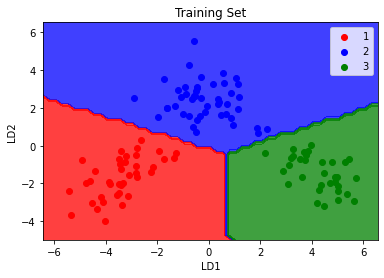

In [38]:
#Visualising Training Set Results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start = X_set[: , 0].min()-1 , stop = X_set[: , 0].max() +1 , step = 0.25),
    np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max() +1 , step = 0.25),
    )
plt.contourf(X1, X2, model.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red' ,'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
    
plt.title("Training Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()
    
    
    
    

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


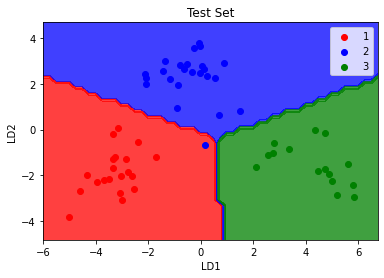

In [39]:
#Visualising Tes Set Results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start = X_set[: , 0].min()-1 , stop = X_set[: , 0].max() +1 , step = 0.25),
    np.arange(start = X_set[: , 1].min()-1 , stop = X_set[: , 1].max() +1 , step = 0.25),
    )
plt.contourf(X1, X2, model.predict(np.array([X1.ravel() , X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red' ,'blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j,1],
               c = ListedColormap(('red', 'blue', 'green'))(i), label = j)
    
plt.title("Test Set")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.show()